# Lab 2.10.2: Regression Analysis—Container Crane Controller 
Obtain the Container Crane Controller Data Set. Download Container Crane Controller Data Set. <p>
A container crane is used to transport containers from one place to another. The difficulty of this task lies in the fact that the bridge crane is connected to the container by cables causing an opening angle when the container is being transported. Interfering with the operation at high speeds due to oscillation that occurs at the end-point could cause accidents.<p>
Use regression analysis to predict the power from speed and angle. This essentially means deriving a linear regression equation.<p>
Now do the same using the gradient descent approach.

In [5]:
import pandas as pd
df = pd.read_csv('LAB 2.10.2_ Container_Crane_Controller_Data_Set.csv').reset_index()
df = df[['Speed', 'Angle', 'Power']]
display(df)

,Speed,Angle,Power
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,0,0.7
5,6,-5,0.5
6,7,5,0.5
7,6,-2,0.3
8,7,2,0.3
9,6,0,0.7


In [9]:
import statsmodels.formula.api as smf

model = smf.ols('Power ~ Speed + Angle', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Power   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.153
Method:                 Least Squares   F-statistic:                   0.07325
Date:                Sat, 12 Apr 2025   Prob (F-statistic):              0.930
Time:                        20:19:09   Log-Likelihood:                 8.7363
No. Observations:                  15   AIC:                            -11.47
Df Residuals:                      12   BIC:                            -9.348
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4751      0.084      5.662      0.0

S:\code\uw\IMT574\py39_venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


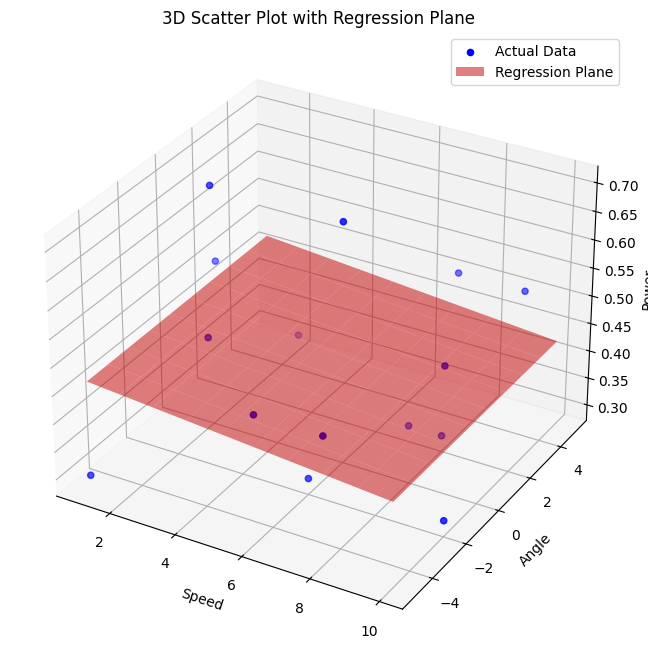

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients
intercept = results.params['Intercept']
slope_speed = results.params['Speed']
slope_angle = results.params['Angle']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(df['Speed'], df['Angle'], df['Power'], c='blue', marker='o', label='Actual Data')

# Create a meshgrid of Speed and Angle values to plot the regression plane
speed_surf, angle_surf = np.meshgrid(np.linspace(df['Speed'].min(), df['Speed'].max(), 10),
                                     np.linspace(df['Angle'].min(), df['Angle'].max(), 10))

# Calculate the predicted Power values for the meshgrid
power_predicted = intercept + slope_speed * speed_surf + slope_angle * angle_surf

# Plot the regression plane
ax.plot_surface(speed_surf, angle_surf, power_predicted, color='red', alpha=0.5, label='Regression Plane')

# Set labels and title
ax.set_xlabel('Speed')
ax.set_ylabel('Angle')
ax.set_zlabel('Power')
ax.set_title('3D Scatter Plot with Regression Plane')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [14]:
print("Predicted Power for each combination of Speed and Angle:")
for index, row in df.iterrows():
    speed = row['Speed']
    angle = row['Angle']
    actual_power = row['Power']
    predicted_power = intercept + slope_speed * speed + slope_angle * angle
    print(f"Speed: {speed}, Angle: {angle} => Predicted Power: {predicted_power:.2f}, actual power: {actual_power}")

Predicted Power for each combination of Speed and Angle:
Speed: 1.0, Angle: -5.0 => Predicted Power: 0.47, actual power: 0.3
Speed: 2.0, Angle: 5.0 => Predicted Power: 0.47, actual power: 0.3
Speed: 3.0, Angle: -2.0 => Predicted Power: 0.46, actual power: 0.5
Speed: 1.0, Angle: 2.0 => Predicted Power: 0.47, actual power: 0.5
Speed: 2.0, Angle: 0.0 => Predicted Power: 0.47, actual power: 0.7
Speed: 6.0, Angle: -5.0 => Predicted Power: 0.44, actual power: 0.5
Speed: 7.0, Angle: 5.0 => Predicted Power: 0.44, actual power: 0.5
Speed: 6.0, Angle: -2.0 => Predicted Power: 0.44, actual power: 0.3
Speed: 7.0, Angle: 2.0 => Predicted Power: 0.44, actual power: 0.3
Speed: 6.0, Angle: 0.0 => Predicted Power: 0.44, actual power: 0.7
Speed: 8.0, Angle: -5.0 => Predicted Power: 0.43, actual power: 0.5
Speed: 9.0, Angle: 5.0 => Predicted Power: 0.43, actual power: 0.5
Speed: 10.0, Angle: -2.0 => Predicted Power: 0.42, actual power: 0.3
Speed: 8.0, Angle: 2.0 => Predicted Power: 0.44, actual power: 0.

## Gradient Descent

In [18]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)
    num_theta = X.shape[1]
    cost_history = np.zeros(iterations)
   # theta_history = np.zeros((iterations,2))
    theta_history = np.zeros((iterations,num_theta))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/n)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost_fun(theta,X,y)
    return theta, cost_history, theta_history    

def cost_fun(theta,X,y):
    '''Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    where:
        j is the no of features
    '''
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/2*n) * np.sum((predictions-y)**2)
    return cost

In [26]:
# Prepare the data
X = df[['Speed', 'Angle']].values
y = df['Power'].values
m = len(y)
n = X.shape[1]  # Number of features (Speed and Angle)

# Initialize parameters (coefficients)
learning_rate = 0.01
iterations = 1000
theta = np.zeros(n + 1)  # [intercept, slope_speed, slope_angle]

# Add bias term (for the intercept) to X
X_b = np.c_[np.ones((m, 1)), X]
# Train the model using Gradient Descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Get the learned coefficients
intercept_gd = theta_final[0]
slope_speed_gd = theta_final[1]
slope_angle_gd = theta_final[2]

print("Gradient Descent Model Coefficients:")
print(f"Intercept: {intercept_gd:.4f}")
print(f"Slope (Speed): {slope_speed_gd:.4f}")
print(f"Slope (Angle): {slope_angle_gd:.4f}")

Gradient Descent Model Coefficients:
Intercept: 0.4193
Slope (Speed): 0.0027
Slope (Angle): -0.0001


In [27]:
print("Predicted Power for each combination of Speed and Angle:")
for index, row in df.iterrows():
    speed = row['Speed']
    angle = row['Angle']
    actual_power = row['Power']
    predicted_power = intercept + slope_speed_gd * speed + slope_angle_gd * angle
    print(f"Speed: {speed}, Angle: {angle} => Predicted Power: {predicted_power:.2f}, actual power: {actual_power}")

Predicted Power for each combination of Speed and Angle:
Speed: 1.0, Angle: -5.0 => Predicted Power: 0.48, actual power: 0.3
Speed: 2.0, Angle: 5.0 => Predicted Power: 0.48, actual power: 0.3
Speed: 3.0, Angle: -2.0 => Predicted Power: 0.48, actual power: 0.5
Speed: 1.0, Angle: 2.0 => Predicted Power: 0.48, actual power: 0.5
Speed: 2.0, Angle: 0.0 => Predicted Power: 0.48, actual power: 0.7
Speed: 6.0, Angle: -5.0 => Predicted Power: 0.49, actual power: 0.5
Speed: 7.0, Angle: 5.0 => Predicted Power: 0.49, actual power: 0.5
Speed: 6.0, Angle: -2.0 => Predicted Power: 0.49, actual power: 0.3
Speed: 7.0, Angle: 2.0 => Predicted Power: 0.49, actual power: 0.3
Speed: 6.0, Angle: 0.0 => Predicted Power: 0.49, actual power: 0.7
Speed: 8.0, Angle: -5.0 => Predicted Power: 0.50, actual power: 0.5
Speed: 9.0, Angle: 5.0 => Predicted Power: 0.50, actual power: 0.5
Speed: 10.0, Angle: -2.0 => Predicted Power: 0.50, actual power: 0.3
Speed: 8.0, Angle: 2.0 => Predicted Power: 0.50, actual power: 0.